<a href="https://colab.research.google.com/github/AslanDevbrat/NLP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Processing

In [ ]:
!git clone https://github.com/Neuralearn/deep-learning-with-tensorflow-2

Cloning into 'deep-learning-with-tensorflow-2'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 28 (delta 16), reused 28 (delta 16), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2022-07-19 06:39:22--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  18.5MB/s    in 9.4s    

2022-07-19 06:39:32 (8.55 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!tar -xzf /content/aclImdb_v1.tar.gz

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing import text_dataset_from_directory
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense, Reshape, Embedding,GRU,Bidirectional
import numpy as np
import re
import string
import nltk
import numpy as np
from matplotlib import pyplot as plt
import pandas
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
train_directory = "/content/aclImdb/train"
val_directory = "/content/aclImdb/test"

In [5]:
!mv /content/aclImdb/train/unsup /content

In [6]:
train_dataset = text_dataset_from_directory(
    train_directory,
)

Found 25000 files belonging to 2 classes.


In [7]:
val_dataset = text_dataset_from_directory(
    val_directory,
    shuffle = True
)

Found 25000 files belonging to 2 classes.


In [8]:
for x, y in train_dataset.take(1):
  print(x)
  print()
  print(y)

tf.Tensor(
[b'Following the brilliant "Goy\xc3\xb4kiba" (aka. "Hanzo The Razor - Sword Of Justice", 1972) and its excellent (and even sleazier) sequel "Goy\xc3\xb4kiba: Kamisori Hanz\xc3\xb4 jigoku zeme" (aka. "Razor 2: The Snare", 1973), this "Goy\xc3\xb4kiba: Oni no Hanz\xc3\xb4 yawahada koban" aka. "Razor 3: Who\'s Got The Gold" is the third, and sadly final installment to the awesome saga about the incorruptible Samurai-constable Hanzo \'The Razor\' Ittami (brilliantly played by the great Shintar\xc3\xb4 Katsu), who fights corruption with his fighting expertise as well as his enormous sexual powers. As a big fan of 70s exploitation cinema made in Nippon, "Sword Of Justice" became an instant favorite of mine, and I was therefore more than eager to find the sequels, and full of anticipation when I finally stumbled over them recently. While this third "Hanzo" film is just not quite as brilliant as its predecessors it is definitely another great piece of cult-cinema that no lover of Ja

In [9]:
def preprocess_sentences(input_data):
    '''
    Input: raw reviews
    output: standardized reviews
    '''
    output=tf.strings.lower(input_data)
    outputs=tf.strings.regex_replace(output,"<[^>]+>","")
    outputs=tf.strings.regex_replace(output,"<[%s]"%re.escape(string.punctuation)," ")
    outputs=tf.strings.regex_replace(output,"  "," ")
    
    return output

In [10]:
# def preprocess_sentences(input_data):

#      output = tf.strings.lower(input_data)
#      output = tf.strings.regex_replace(output, "<[^>]+>","")
#      output = tf.strings.regex_replace(output,'[%s]' %re.escape(string.punctuation), "  ")
#      output = tf.strings.regex_replace(output, '  '," "  )
#      lemmatizer = nltk.stem.WordNetLemmatizer()
#      output = tf.strings.join([lemmatizer.lemmatize(str(word)[12:-26], pos = "a") for word in tf.strings.split(output)], separator = " ")
#      return output
# preprocess_sentences("I kind of consider myself as the #1 fan of Hidden Frontier")


In [11]:
VOCAB_SIZE=2000
SEQUENCE_LENGTH=100
vectorize_layer=TextVectorization(
    standardize=preprocess_sentences,
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH,
)
training_data=train_dataset.map(lambda x,y:x)### inputsxandyand outputsx
vectorize_layer.adapt(training_data)### Adapt the vectorize Layer to the training data

In [12]:
def vectorizer(review, label):
  return vectorize_layer(review), label


In [13]:
train_dataset = train_dataset.map(vectorizer)
val_dataset = val_dataset.map(vectorizer)

In [ ]:
for x , y in train_dataset.take(1):
  print(x,y)

tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]]

In [14]:
train_dataset=train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train_dataset


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 2000), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Modeling


In [ ]:
class RNNCell(tf.keras.layers.Layer):
  def __init__(self, units = 4, hidden_size = 7,):
    super(RNNCell, self).__init__()

    self.units = units
    self.hidden_size = hidden_size

  def build(self, input_shape):
    print(input_shape)

    self.w_hh = self.add_weight(
        shape = (self.hidden_size, self.hidden_size),
        initializer = "random_normal",
        trainable = True,
    )
    self.w_hx = self.add_weight(
        shape = (input_shape[-1], self.hidden_size),
        initializer = "random_normal",
        trainable = True,
    )
    self.w_yh = self.add_weight(
        shape = (self.hidden_size, self.units),
        initializer = "random_normal",
        trainable = True,
    )

    self.b_h = self.add_weight(
        shape = (self.hidden_size,),
        initializer = "random_normal",
        trainable = True,
    )
    
    self.b_y = self.add_weight(
        shape = (self.units,),
        initializer = "random_normal",
        trainable = True,
    )

  def call(self, inputs, h_prev = None):
    if(h_prev == None):
      h_prev = tf.zeros([inputs.shape[0], self.hidden_size])
    h = tf.nn.tanh(tf.matmul(h_prev, self.w_hh) + tf.matmul(inputs, self.w_hx) + self.b_h)
    y = tf.nn.tanh(tf.matmul(h, self.w_yh) + self.b_y)
    
    return tf.constant(h), tf.constant(y)


In [ ]:
input = tf.zeros([8,  2000])
layer = RNNCell()
h,y = layer(input)
h.shape, y.shape

(8, 2000)


(TensorShape([8, 7]), TensorShape([8, 4]))

In [ ]:
class RNN(tf.keras.layers.Layer):
  def __init__(self, units, ):
    super(RNN, self).__init__()
    self.rnn = RNNCell(units)

  def call(self, inputs):
    output = []

    h,y = self.rnn(input[:,0,:])
    output.append(y)

    for i in range(1, input.shape[-2]):
      h, y = self.rnn(input[:,i,:], h)
      output.append(y)
    shape = np.array(output).shape
    return tf.reshape(output,[ shape[1], shape[0], shape[2]])


In [ ]:
input = tf.zeros([8, 100,2000])
layer = RNN(4)
output = layer(input)
output.shape

(8, 2000)


TensorShape([8, 100, 4])

In [ ]:
input = tf.zeros([8, 100,2000])
layer = SimpleRNN(4, activation = 'tanh', use_bias = True, return_sequences=False, name = "layer1")

output = layer(input)
output.shape

TensorShape([8, 4])

In [ ]:
 input = tf.keras.layers.Input(shape = (SEQUENCE_LENGTH,))
 embedding_size = 256

 model = tf.keras.models.Sequential([
                                     input,
                                     tf.keras.layers.Embedding(VOCAB_SIZE, embedding_size),
                                     SimpleRNN(4, activation = 'tanh', use_bias = True, return_sequences=True, name = "layer1"),
                                     Dense(1, activation = "relu", name="layer2"),
                                     Reshape((SEQUENCE_LENGTH,), name = "layer3"),
                                     Dense(1, activation = "sigmoid", name = "layer4")
 ])
 model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 256)          512000    
                                                                 
 layer1 (SimpleRNN)          (None, 100, 4)            1044      
                                                                 
 layer2 (Dense)              (None, 100, 1)            5         
                                                                 
 layer3 (Reshape)            (None, 100)               0         
                                                                 
 layer4 (Dense)              (None, 1)                 101       
                                                                 
Total params: 513,150
Trainable params: 513,150
Non-trainable params: 0
_________________________________________________________________


# Training and Validation and Testing

In [ ]:
LR = 1e-4
EPOCH = 50

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(lr = LR,),
    metrics = ["accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint_filepath  = "basic_rnn.hdf5"

#checkpoint_filepath="imdb/basic_rnn.hdf5"
callback=tf.keras.callbacks.ModelCheckpoint(
   filepath=checkpoint_filepath,### WHERE BEST WEIGHTS ARE STORED
    save_weights_only=True,
   monitor="loss",
   mode='min',
    save_best_only=True)
#Train model on dataset
history=model.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])#

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 79s 100ms/step - loss: 0.6943 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.4972
Epoch 2/50
782/782 [==============================] - 78s 99ms/step - loss: 0.6929 - accuracy: 0.5111 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 3/50
782/782 [==============================] - 79s 101ms/step - loss: 0.6920 - accuracy: 0.5238 - val_loss: 0.6929 - val_accuracy: 0.5062
Epoch 4/50
782/782 [==============================] - 78s 100ms/step - loss: 0.6907 - accuracy: 0.5358 - val_loss: 0.6926 - val_accuracy: 0.5113
Epoch 5/50
782/782 [==============================] - 78s 99ms/step - loss: 0.6849 - accuracy: 0.5412 - val_loss: 0.6812 - val_accuracy: 0.5510
Epoch 6/50
782/782 [==============================] - 79s 101ms/step - loss: 0.6501 - accuracy: 0.6271 - val_loss: 0.6419 - val_accuracy: 0.6544
Epoch 7/50
782/782 [==============================] - 78s 99ms/step - loss: 0.6094 - accuracy: 0.7084 - val_loss: 0.6176 - val_accuracy: 0.7038

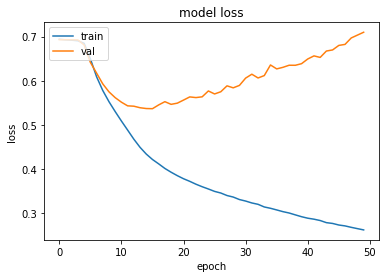

In [ ]:
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

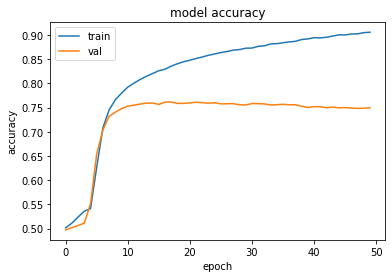

In [ ]:
plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [ ]:
test_data = tf.data.Dataset.from_tensor_slices([["i love it"],["i dont like movie"]
])

In [ ]:
def vectorizer_test(review):
    return tf.one_hot(vectorize_layer(review),depth=VOCAB_SIZE)

test_dataset=test_data.map(vectorizer_test)
model.predict(test_dataset)

array([[0.9695122],
       [0.7549498]], dtype=float32)

#Embedding

In [ ]:
input = tf.zeros([2000])
layer = Embedding(2, 100)

output = layer(input)
print(output[0].shape)
print(output[1].shape)
print(output[2].shape)
print(output.shape)

(100,)
(100,)
(100,)
(2000, 100)


In [ ]:
input = tf.keras.layers.Input(shape = (SEQUENCE_LENGTH,),)
embedding_size = 100
embedding = Embedding(VOCAB_SIZE, embedding_size)
model1 = tf.keras.models.Sequential([
                                     input,
                                     embedding,
                                     LSTM(20, activation = 'tanh', use_bias = True, return_sequences=True, name = "layer1"),
                                     Dense(1, activation = "relu", name="layer2"),
                                     Reshape((SEQUENCE_LENGTH,), name = "layer3"),
                                     Dense(1, activation = "sigmoid", name = "layer4")
 ])
model1.summary()

LR = 1e-4
EPOCH = 50

model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(lr = LR,),
    metrics = ["accuracy"],
)
checkpoint_filepath  = "lstm_embeding.hdf5"

#checkpoint_filepath="imdb/basic_rnn.hdf5"
callback=tf.keras.callbacks.ModelCheckpoint(
   filepath=checkpoint_filepath,### WHERE BEST WEIGHTS ARE STORED
    save_weights_only=True,
   monitor="val_loss",
   mode='min',
    save_best_only=True)
#Train model on dataset
history=model1.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])#

plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 100, 100)          200000    
                                                                 
 layer1 (LSTM)               (None, 100, 20)           9680      
                                                                 
 layer2 (Dense)              (None, 100, 1)            21        
                                                                 
 layer3 (Reshape)            (None, 100)               0         
                                                                 
 layer4 (Dense)              (None, 1)                 101       
                                                                 
Total params: 209,802
Trainable params: 209,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


585/782 [=====================>........] - ETA: 11s - loss: 0.6708 - accuracy: 0.5372

KeyboardInterrupt: ignored

## LSTM

In [ ]:
input = tf.zeros([8, 100,2000])
layer = LSTM(4, activation = 'tanh', use_bias = True, return_sequences=True, return_state = True)

output = layer(input)
print(output[0].shape)
print(output[1].shape)
print(output[2].shape)
print(len(output))

(8, 100, 4)
(8, 4)
(8, 4)
3


In [ ]:
 input = tf.keras.layers.Input(shape = (SEQUENCE_LENGTH,))
 embedding_size = 256

 model = tf.keras.models.Sequential([
                                     input,
                                
                                     tf.keras.layers.Embedding(VOCAB_SIZE, embedding_size),
                                     LSTM(4, activation = 'tanh', use_bias = True, return_sequences=True, name = "layer1"),
                                     Dense(1, activation = "relu", name="layer2"),
                                     Reshape((SEQUENCE_LENGTH,), name = "layer3"),
                                     Dense(1, activation = "sigmoid", name = "layer4")
 ])
 model.summary()

LR = 1e-4
EPOCH = 50

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(lr = LR,),
    metrics = ["accuracy"],
)
checkpoint_filepath  = "basic_rnn.hdf5"

#checkpoint_filepath="imdb/basic_rnn.hdf5"
callback=tf.keras.callbacks.ModelCheckpoint(
   filepath=checkpoint_filepath,### WHERE BEST WEIGHTS ARE STORED
    save_weights_only=True,
   monitor="loss",
   mode='min',
    save_best_only=True)
#Train model on dataset
history=model.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])#

plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 100, 256)          512000    
                                                                 
 layer1 (LSTM)               (None, 100, 4)            4176      
                                                                 
 layer2 (Dense)              (None, 100, 1)            5         
                                                                 
 layer3 (Reshape)            (None, 100)               0         
                                                                 
 layer4 (Dense)              (None, 1)                 101       
                                                                 
Total params: 516,282
Trainable params: 516,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 50/782 [>.............................] - ETA: 42s - loss: 0.6929 - accuracy: 0.5113

KeyboardInterrupt: ignored

# GRU

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100, 20)           121320    
                                                                 
 dense_6 (Dense)             (None, 100, 1)            21        
                                                                 
 reshape_3 (Reshape)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,442
Trainable params: 121,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 219s 197ms/step - loss: 0.6281 - accuracy: 0.6278 - val_loss: 0.5516 - val_accuracy: 0.7573
Epoch 2/15
782/782 [==============================] - 155s 198ms/step - loss: 0.5168 - accuracy: 0.7838 - val_loss: 0.5098 - val_accuracy: 0.7807
Epoch 3/15
782/782 [==============================] - 154s 197ms/step - loss: 0.4723 - accuracy: 0.8028 - val_loss: 0.4887 - val_accuracy: 0.7835
Epoch 4/15
782/782 [==============================] - 154s 197ms/step - loss: 0.4437 - accuracy: 0.8120 - val_loss: 0.4914 - val_accuracy: 0.7852
Epoch 5/15
782/782 [==============================] - 153s 196ms/step - loss: 0.4249 - accuracy: 0.8224 - val_loss: 0.4773 - val_accuracy: 0.7848
Epoch 6/15
782/782 [==============================] - 154s 197ms/step - loss: 0.4116 - accuracy: 0.8272 - val_loss: 0.4740 - val_accuracy: 0.7846
Epoch 7/15
782/782 [==============================] - 153s 196ms/step - loss: 0.3994 - accuracy: 0.8317 - val_loss: 0.4792 - val_accura

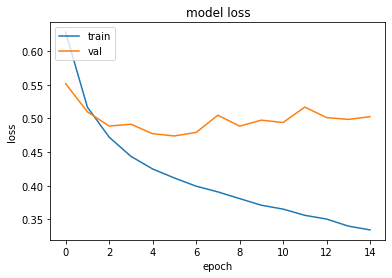

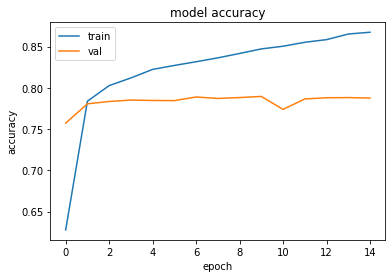

In [ ]:
inputs=tf.keras.layers.Input(shape=(SEQUENCE_LENGTH,VOCAB_SIZE),)
EMBEDDING_DIM=100
embedding=tf.keras.layers.Embedding(VOCAB_SIZE,EMBEDDING_DIM)
model=  tf.keras.models.Sequential([
    inputs,
    
    tf.keras.layers.GRU(20,activation='tanh',use_bias=True,return_sequences=True),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Reshape((SEQUENCE_LENGTH,)),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.summary()

LR=5e-4
EPOCH=15
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=LR,),
    metrics=['accuracy']
)
checkpoint_filepath  = "basic_rnn.hdf5"

callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_loss",
    mode='min',
    save_best_only=True)
#Train model on dataset
history = model.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()


# 1D Convolution

In [ ]:
inputs= tf.keras.layers.Input(shape=(SEQUENCE_LENGTH,),)#SEQUENCE_LENGTH,),)
EMBEDDING_DIM=200
embedding =tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM,)
model=tf.keras.models.Sequential([
    inputs,
    embedding,
   tf.keras.layers.Conv1D(EMBEDDING_DIM,kernel_size=2,activation='relu',),
   tf.keras.layers.MaxPooling1D(2),

   tf.keras.layers.GlobalMaxPooling1D(),
   tf.keras.layers.Dense(1,activation='sigmoid'),
   ])
model.summary()

LR=5e-4
EPOCH=15
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=LR,),
    metrics=['accuracy']
)
checkpoint_filepath  = "basic_rnn.hdf5"

callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_loss",
    mode='min',
    save_best_only=True)
#Train model on dataset
history = model.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_47 (Embedding)    (None, 100, 200)          400000    
                                                                 
 conv1d_32 (Conv1D)          (None, 99, 200)           80200     
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 49, 200)          0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_30 (Gl  (None, 200)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_29 (Dense)            (None, 1)                 201       
                                                                 
Total params: 480,401
Trainable params: 480,401
Non-t

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 42/782 [>.............................] - ETA: 1:05 - loss: 0.6897 - accuracy: 0.5201

KeyboardInterrupt: ignored

# Bidirectional

In [ ]:
inputs= tf.keras.layers.Input(shape=(SEQUENCE_LENGTH,),)#SEQUENCE_LENGTH,),)
EMBEDDING_DIM=200
embedding =tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM,)
model=tf.keras.models.Sequential([
    inputs,
    embedding,
    Bidirectional(tf.keras.layers.GRU(20,activation='tanh',use_bias=True,return_sequences=True)),
    tf.keras.layers.Dense(1,activation='relu'),
    tf.keras.layers.Reshape((SEQUENCE_LENGTH,)),
    tf.keras.layers.Dense(1,activation='sigmoid'),
   ])
model.summary()

LR=5e-4
EPOCH=15
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=LR,),
    metrics=['accuracy']
)
checkpoint_filepath  = "basic_rnn.hdf5"

callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor="val_loss",
    mode='min',
    save_best_only=True)
#Train model on dataset
history = model.fit(train_dataset,validation_data=val_dataset,verbose=1,epochs=EPOCH,callbacks=[callback])
plt.plot(history.history["loss"][:])
plt.plot(history.history["val_loss"][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

plt.plot(history.history["accuracy"][:])
plt.plot(history.history["val_accuracy"][:])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 200)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 40)          26640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 100, 1)            41        
                                                                 
 reshape (Reshape)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 426,782
Trainable params: 426,782
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


278/782 [=========>....................] - ETA: 1:10 - loss: 0.6932 - accuracy: 0.5065